<a href="https://colab.research.google.com/github/roberthouston14/Final_Praxis_Code/blob/main/BERT_Only_Encode_and_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
GOLD
from google.colab import drive
drive.mount('/content/drive')

NameError: ignored

In [ ]:
GOLD
!pip install datasets
!pip install transformers
# !pip install tqdm
!pip install accelerate -U
!pip install transformers[torch]

## Overview
This code is for training and evaluating a text classification model using various BERT-based models. It can handle multiple classes and calculates several classification metrics. The code includes user prompts for selecting model hyperparameters, training arguments, and file paths for data. Results are saved as a CSV file and the macro-average ROC curve is plotted.

## Major Functions and Outputs

### `get_user_choice(prompt, choices)`
**Parameters**
- `prompt` (str): Text to display as a prompt for user input.
- `choices` (list): List of options for the user to choose from.

**Description**: This function displays a list of options to the user and prompts them to select one by entering the corresponding number. It returns the index of the user's chosen option.

### `encode(examples)`
**Parameters**
- `examples` (dict): Dictionary containing the text data to be encoded.

**Description**: This function encodes the text data using the specified tokenizer. Text data is truncated and padded to a maximum length of 512 tokens. It returns a dictionary with the encoded input data.

### `compute_metrics(eval_pred)`
**Parameters**
- `eval_pred` (tuple): Tuple containing the logits and labels.

**Description**: This function calculates the accuracy metric given the predicted logits and true labels. It returns a dictionary containing the accuracy value.

### `SpamDataset` class
**Description**: A custom PyTorch Dataset class that handles tokenized encodings and labels for each example in the dataset.

**Methods**
- `__init__(self, encodings, labels)`: Initializes the dataset with tokenized encodings and labels.
- `__getitem__(self, idx)`: Returns the tokenized encodings and labels for a specific example in the dataset.
- `__len__(self)`: Returns the total number of examples in the dataset.

## Code Workflow

1. Import the required libraries and set the device to GPU if available.
2. Prompt the user for file paths to the training and testing datasets and column names for text data and labels.
3. Load the data into Pandas DataFrames and extract text and label columns.
4. Encode the labels using a LabelEncoder.
5. Present a list of available BERT models to the user and prompt for model selection.
6. Load the selected BERT tokenizer and model for sequence classification with the specified number of labels.
7. Tokenize the text data for training and testing datasets.
8. Create PyTorch datasets using the `SpamDataset` class.
9. Prompt the user to select the number of epochs, batch size, and learning rate.
10. Set up training arguments and instantiate a Trainer.
11. Train and evaluate the model.
12. Get the model's predictions and labels for the test dataset and print a classification report.
13. Compute the Aggregate Score using specified weights.
14. Prepare data for CSV export, prompt the user for a file name and path, and save the results as a CSV file.
15. Calculate the macro-average ROC curve and plot it.

## Outputs

- Classification Report: Printed in the console, detailing metrics such as precision, recall, and F1-score for each class.
- CSV file: Saved to the user-specified path, containing the classification metrics and the Aggregate Score.
- ROC Curve Plot: Displayed in the output, showing the macro-average ROC curve.


Enter the path to the training data: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Tiny_Dataset_5971_deduped_training.csv
Enter the path to the testing data: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Test & Validata Data/Dataset_5971_deduped_testing.csv
Enter the column name for the text data: TEXT
Enter the column name for the labels: LABEL

Choose a BERT model:
1. distilbert-base-uncased
2. bert-base-uncased
3. bert-large-uncased
4. roberta-base
5. roberta-large
6. albert-base-v2
7. albert-large-v2
8. microsoft/deberta-base
9. xlm-roberta-base
10. xlm-roberta-large
11. google/electra-small-discriminator
12. google/electra-base-discriminator
13. google/electra-large-discriminator
Enter the number corresponding to the desired BERT model: 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Choose the number of epochs:
1. 1
2. 3
3. 5
4. 10
Enter the number corresponding to your choice: 2

Choose the batch size:
1. 16
2. 32
3. 64
4. 128
Enter the number corresponding to your choice: 2

Choose the learning rate:
1. 1e-05
2. 2e-05
3. 5e-05
4. 0.0001
Enter the number corresponding to your choice: 2


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
10,0.916500,0.715542,0.839866


Classification Report:
 {'ham': {'precision': 0.8951911220715166, 'recall': 1.0, 'f1-score': 0.9446974625894601, 'support': 726}, 'smishing': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 94}, 'spam': {'precision': 0.5365853658536586, 'recall': 0.6027397260273972, 'f1-score': 0.567741935483871, 'support': 73}, 'accuracy': 0.8622620380739082, 'macro avg': {'precision': 0.8105921626417251, 'recall': 0.5342465753424658, 'f1-score': 0.5041464660244437, 'support': 893}, 'weighted avg': {'precision': 0.8769087192958993, 'recall': 0.8622620380739082, 'f1-score': 0.8144406709185562, 'support': 893}}
Enter the desired file name (e.g., results): Test_Number_4
Enter the path to save the .csv file: /content/drive/MyDrive/Production Datasets/Hypothesis 4 Files
Results saved to /content/drive/MyDrive/Production Datasets/Hypothesis 4 Files/Test_Number_4.csv


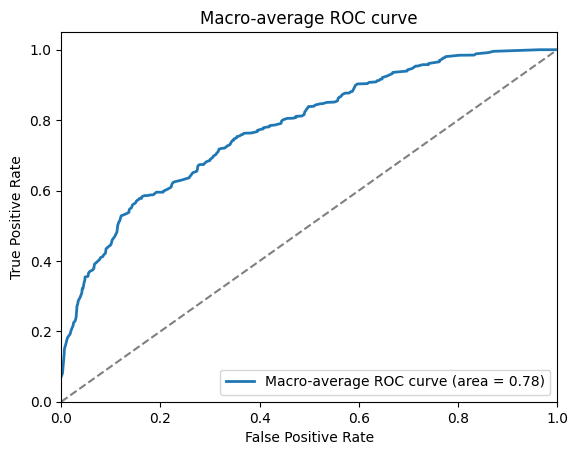

In [ ]:
#GOLD
import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import numpy as np
from transformers import ElectraForSequenceClassification, ElectraTokenizer, Trainer, TrainingArguments
from datasets import load_dataset

%matplotlib inline

def get_user_choice(prompt, choices):
    print(prompt)
    for i, choice in enumerate(choices):
        print(f"{i + 1}. {choice}")
    user_choice = int(input("Enter the number corresponding to your choice: ")) - 1
    return user_choice

available_epochs = [1, 3, 5, 10]
available_batch_sizes = [16, 32, 64, 128]
available_learning_rates = [1e-5, 2e-5, 5e-5, 1e-4]

def encode(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = np.sum(predictions == labels) / len(labels)
    return {'accuracy': accuracy}

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prompt user for paths to train and test datasets
train_data_path = input("Enter the path to the training data: ")
test_data_path = input("Enter the path to the testing data: ")

# Load train and test data
train_data_df = pd.read_csv(train_data_path)
test_data_df = pd.read_csv(test_data_path)

# Prompt user for column names
text_column = input("Enter the column name for the text data: ")
label_column = input("Enter the column name for the labels: ")

# Prepare data
X_train = train_data_df[text_column]
y_train = train_data_df[label_column]
X_test = test_data_df[text_column]
y_test = test_data_df[label_column]

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define available BERT models
bert_models = [
    "distilbert-base-uncased",
    "bert-base-uncased",
    "bert-large-uncased",
    "roberta-base",
    "roberta-large",
    "albert-base-v2",
    "albert-large-v2",
    "microsoft/deberta-base",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator"
]

# Prompt user for BERT model choice
print("\nChoose a BERT model:")
for i, model in enumerate(bert_models):
    print(f"{i + 1}. {model}")

bert_model_choice = int(input("Enter the number corresponding to the desired BERT model: ")) - 1
bert_model_name = bert_models[bert_model_choice]

# Load selected BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModelForSequenceClassification.from_pretrained(bert_model_name, num_labels=len(le.classes_)).to(device)

# Prepare the datasets for training and evaluation
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

class SpamDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SpamDataset(train_encodings, y_train_encoded)
test_dataset = SpamDataset(test_encodings, y_test_encoded)

# Get user input for training arguments
epochs_choice = get_user_choice("\nChoose the number of epochs:", available_epochs)
epochs = available_epochs[epochs_choice]

batch_size_choice = get_user_choice("\nChoose the batch size:", available_batch_sizes)
batch_size = available_batch_sizes[batch_size_choice]

learning_rate_choice = get_user_choice("\nChoose the learning rate:", available_learning_rates)
learning_rate = available_learning_rates[learning_rate_choice]

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps=0,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    learning_rate=learning_rate,
)

# Train and evaluate the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.evaluate()

# Get predictions and labels for the test dataset
test_predictions = trainer.predict(test_dataset)
test_logits, test_labels = test_predictions.predictions, test_predictions.label_ids
test_preds = np.argmax(test_logits, axis=-1)

# Print classification report with zero_division handling
report = classification_report(test_labels, test_preds, target_names=le.classes_, output_dict=True, zero_division=1)
print("Classification Report:\n", report)

# Extract f1-scores and other metrics for ham, spam, and smishing
f1_ham = report['ham']['f1-score']
precision_ham = report['ham']['precision']
recall_ham = report['ham']['recall']

f1_spam = report['spam']['f1-score']
precision_spam = report['spam']['precision']
recall_spam = report['spam']['recall']

f1_smishing = report.get('smishing', {}).get('f1-score', 0)  # Safe extraction in case 'smishing' isn't present
precision_smishing = report.get('smishing', {}).get('precision', 0)
recall_smishing = report.get('smishing', {}).get('recall', 0)

# Compute the Aggregate Score using given weights
aggregate_score = (f1_ham * 1 + f1_spam * 2 + f1_smishing * 3) / 6

# Prepare data for CSV
data = {
    'Model': [bert_model_name],
    'Accuracy': [report['accuracy']],
    'ham Precision': [precision_ham],
    'ham Recall': [recall_ham],
    'ham F1-score': [f1_ham],
    'smishing Precision': [precision_smishing],
    'smishing Recall': [recall_smishing],
    'smishing F1-score': [f1_smishing],
    'spam Precision': [precision_spam],
    'spam Recall': [recall_spam],
    'spam F1-score': [f1_spam],
    'Aggregate Score': [aggregate_score]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Prompt user for file name and path to save the CSV
file_name = input("Enter the desired file name (e.g., results): ")
if not file_name.endswith('.csv'):
    file_name += '.csv'
save_path = input("Enter the path to save the .csv file: ")
full_path = os.path.join(save_path, file_name)

# Save DataFrame to CSV
df.to_csv(full_path, index=False)

print(f"Results saved to {full_path}")

# Calculate ROC curve, macro-average ROC-AUC, and plot it
y_true_bin = label_binarize(test_labels, classes=range(len(le.classes_)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = test_logits

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])

plt.plot(all_fpr, mean_tpr, label=f"Macro-average ROC curve (area = {roc_auc_macro:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC curve")
plt.legend(loc="lower right")
plt.show()